  # PLAYER CLUSTERS

#### Aim: To create clusters of players based on their strengths in order to show a well-rounded cricket team of all time.


In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# A. Data preprocessing

In [93]:
# Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [94]:
# Retrieving the first dataset

runs = pd.read_csv(r'/content/drive/My Drive/Sem 8/ML/IA/IA2/datasets/Ball_by_Ball.csv')
runs.head()

,Match_Id,Innings_Id,Over_Id,Ball_Id,Team_Batting_Id,Team_Bowling_Id,Striker_Id,Striker_Batting_Position,Non_Striker_Id,Bowler_Id,Batsman_Scored,Extra_Type,Extra_Runs,Player_dissimal_Id,Dissimal_Type,Fielder_Id
0,335987,1,1,1,1,2,1,1,2,14,0,legbyes,1,,,
1,335987,1,1,2,1,2,2,2,1,14,0,,,,,
2,335987,1,1,3,1,2,2,2,1,14,0,wides,1,,,
3,335987,1,1,4,1,2,2,2,1,14,0,,,,,
4,335987,1,1,5,1,2,2,2,1,14,0,,,,,


In [95]:
# Retrieving the second dataset

Players = pd.read_csv(r'/content/drive/My Drive/Sem 8/ML/IA/IA2/datasets/Player.csv')
Players = Players.drop(["Is_Umpire", "Unnamed: 7"], axis = 1)
# Players = Players[["Player_Id", "Player_Name"]]
Players.head()

,Player_Id,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,1,SC Ganguly,8-Jul-72,Left_Hand,Right-arm medium,India
1,2,BB McCullum,27-Sep-81,Right_Hand,Right-arm medium,New Zealand
2,3,RT Ponting,19-Dec-74,Right_Hand,Right-arm medium,Australia
3,4,DJ Hussey,15-Jul-77,Right_Hand,Right-arm offbreak,Australia
4,5,Mohammad Hafeez,17-Oct-80,Right_Hand,Right-arm offbreak,Pakistan


In [96]:
# Keeping only the relevant data for analysis

runs = runs[["Match_Id", "Over_Id", "Striker_Id", "Bowler_Id", "Batsman_Scored", "Extra_Runs"]]
runs.head()

,Match_Id,Over_Id,Striker_Id,Bowler_Id,Batsman_Scored,Extra_Runs
0,335987,1,1,14,0,1
1,335987,1,2,14,0,
2,335987,1,2,14,0,1
3,335987,1,2,14,0,
4,335987,1,2,14,0,


#### The Extra_Runs column contains null values. 

In [97]:
# Checking for null values

runs.isnull().sum()

Match_Id          0
Over_Id           0
Striker_Id        0
Bowler_Id         0
Batsman_Scored    0
Extra_Runs        0
dtype: int64

In [98]:
# Since isnull() gives no null values, we check for data types.

runs.dtypes

Match_Id           int64
Over_Id            int64
Striker_Id         int64
Bowler_Id          int64
Batsman_Scored    object
Extra_Runs        object
dtype: object

#### Converting object columns into numeric values.

In [99]:
# Replacing null values with 0 runs.

runs["Extra_Runs"] = pd.to_numeric(runs["Extra_Runs"], errors="coerce")
runs["Extra_Runs"] = runs["Extra_Runs"].fillna(0)

runs["Batsman_Scored"] = pd.to_numeric(runs["Batsman_Scored"], errors="coerce")
runs["Batsman_Scored"] = runs["Batsman_Scored"].fillna(0)
runs.head(14)

,Match_Id,Over_Id,Striker_Id,Bowler_Id,Batsman_Scored,Extra_Runs
0,335987,1,1,14,0.0,1.0
1,335987,1,2,14,0.0,0.0
2,335987,1,2,14,0.0,1.0
3,335987,1,2,14,0.0,0.0
4,335987,1,2,14,0.0,0.0
5,335987,1,2,14,0.0,0.0
6,335987,1,2,14,0.0,1.0
7,335987,2,2,15,0.0,0.0
8,335987,2,2,15,4.0,0.0
9,335987,2,2,15,4.0,0.0


# B. Creating a dataframe for Batsmen

####Strike rate of a batsman can be calculated with the help of the number of runs scored by him and the number of balls he faced.

####strike_rate = runs per 100 balls faced

In [100]:
A = []
B = []

for i in runs["Striker_Id"].unique():
    a = runs["Batsman_Scored"][runs["Striker_Id"] == i].sum()
    b = runs["Match_Id"][runs["Striker_Id"] == i].count()
    A.append(a)
    B.append(b)

Batsmen = pd.DataFrame({"Player_names": runs["Striker_Id"].unique()})

Batsmen["Runs"] = A
Batsmen["Balls_played"] = B

# Calculating strike rate using the formula (strike_rate = runs per 100 balls faced)

Batsmen["Strike_Rate"] = (Batsmen["Runs"] * 100 / Batsmen["Balls_played"]).round(2)


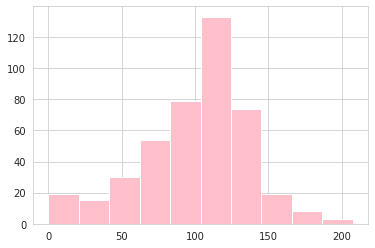

In [101]:
# Checking the distribution of batsmen

Batsmen["Strike_Rate"].hist(color="pink")

**Filter 1**
*Since we have to assess batsmen, the players with very low strike rates are not required to be considered as they tend to bat very few times and are usually bowlers/fielders.*

In [102]:
Batsmen = Batsmen[Batsmen["Strike_Rate"] > 60]
Batsmen = Batsmen[Batsmen["Strike_Rate"] < 150]

**Filter 2** 
*run rate: runs per over(or per 6 balls)*

In [103]:
Batsmen = Batsmen[(Batsmen["Runs"]*6/Batsmen["Balls_played"]) > 6]

In [104]:
Batsmen.head()

,Player_names,Runs,Balls_played,Strike_Rate
0,1,1349.0,1326,101.73
1,2,2435.0,1954,124.62
3,4,1322.0,1101,120.07
5,6,2170.0,1918,113.14
6,7,130.0,129,100.78


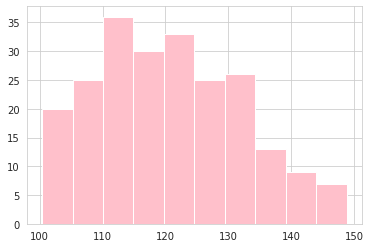

In [105]:
Batsmen["Strike_Rate"].hist(color="pink")

# C. Applying K Means Clustering on Batsmen Data

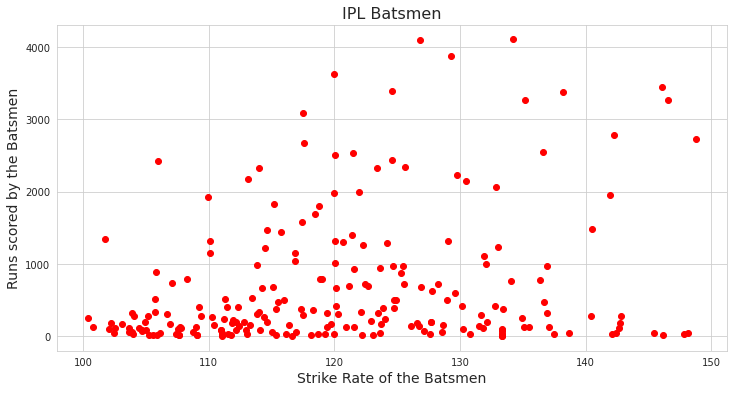

In [106]:
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("whitegrid")
fig = plt.figure(figsize=(12,6))
plt.scatter(Batsmen["Strike_Rate"], Batsmen["Runs"], color="red")
plt.xlabel("Strike Rate of the Batsmen", fontsize=14)
plt.ylabel("Runs scored by the Batsmen", fontsize=14)
plt.title("IPL Batsmen", fontsize=16)
plt.show()

#### The distribution of the Batsmen appears to be in largely five clusters:
**under 500 runs - highest density of dots**

*500 - 1000 runs*

*1000 - 2000 runs*

*2000 - 3000 runs*

*above 3000 runs*

### Applying the clustering algorithm

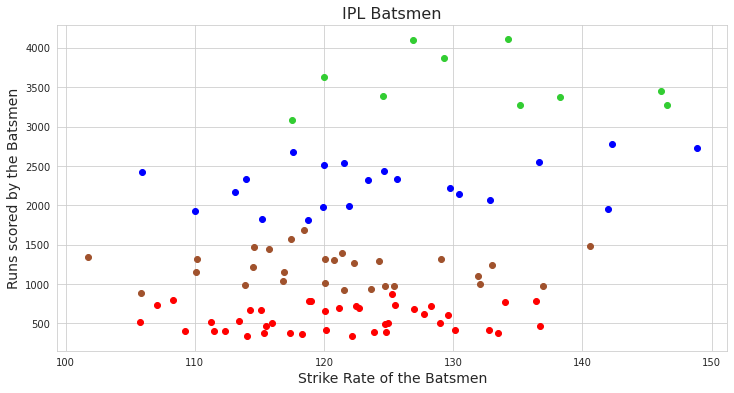

In [107]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(Batsmen[["Strike_Rate", "Runs"]])
Batsmen["cluster"] = kmeans.labels_

fig = plt.figure(figsize=(12,6))

colors = ["blue", "sienna", "limegreen", "red", "black"]

for r in range(1,6):
    clustered_Batsmen = Batsmen[Batsmen["cluster"] == r]
    plt.scatter(clustered_Batsmen["Strike_Rate"], clustered_Batsmen["Runs"], color=colors[r-1])
    
plt.title("IPL Batsmen", fontsize=16)
plt.xlabel("Strike Rate of the Batsmen", fontsize=14)
plt.ylabel("Runs scored by the Batsmen", fontsize=14)
    
plt.show()

### Merging the Player dataframe and Batsmen dataframe to show player names and cluster ids.

In [108]:
Batsmen = Batsmen.rename(columns={"Player_names": "Player_Id"})
Batsmen = Batsmen.sort_values(by ='cluster' )
Batsmen.head()

,Player_Id,Runs,Balls_played,Strike_Rate,cluster
182,182,81.0,71,114.08,0
231,231,237.0,213,111.27,0
239,240,10.0,9,111.11,0
240,241,203.0,159,127.67,0
243,244,34.0,26,130.77,0


In [109]:
Players_batsmen = Players[["Player_Id", "Player_Name","Batting_Hand","DOB","Country"]]

Displaying the Batting Hand of Batsmen

In [110]:
Batsmen = Batsmen[Batsmen.columns].merge(Players_batsmen, "left")
Batsmen

,Player_Id,Runs,Balls_played,Strike_Rate,cluster,Player_Name,Batting_Hand,DOB,Country
0,182,81.0,71,114.08,0,LA Carseldine,Left_Hand,17-Nov-75,Australia
1,231,237.0,213,111.27,0,MD Mishra,Right_Hand,9-Feb-84,India
2,240,10.0,9,111.11,0,KAJ Roach,Right_Hand,30-Jun-88,West Indies
3,241,203.0,159,127.67,0,PD Collingwood,Right_Hand,26-May-76,England
4,244,34.0,26,130.77,0,A Mithun,Right_Hand,25-Oct-89,India
...,...,...,...,...,...,...,...,...,...
219,280,423.0,325,130.15,4,NLTC Perera,Left_Hand,3-Apr-89,Sri Lanka
220,74,739.0,690,107.10,4,GC Smith,Left_Hand,1-Feb-81,South Africa
221,372,379.0,284,133.45,4,CJ Anderson,Left_Hand,13-Dec-90,New Zealand
222,329,342.0,280,122.14,4,Gurkeerat Singh,Right_Hand,29-Jun-90,India


In [111]:
def plot_bar(df, feat_x, feat_y, normalize=True):
    """ Plot with vertical bars of the requested dataframe and features"""
    
    ct = pd.crosstab(df[feat_x], df[feat_y])
    if normalize == True:
        ct = ct.div(ct.sum(axis=1), axis=0)
    return ct.plot(kind='bar', stacked=True)

**Data visualization of Batting Hand and Cluster assigned to player**

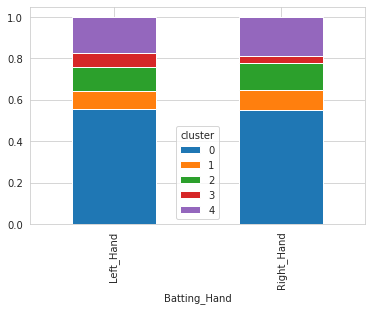

In [112]:
plot_bar(Batsmen, 'Batting_Hand', 'cluster')
plt.show()

Saving the batsmen data along with the batting hand and cluster id in a csv file 

In [113]:
Batsmen.to_csv('Batsmen.csv') 

# D. Creating a dataframe for Bowler data

####Economy rate of a bowler can be calculated with the help of the number of runs conceded by him and the number of balls he bowled.

####economy rate = total runs conceded/number of overs bowled

In [114]:
C = []
E = []

for j in runs["Bowler_Id"].unique():
    c = runs["Batsman_Scored"][runs["Bowler_Id"] == j].sum() + runs["Extra_Runs"][runs["Bowler_Id"] == j].sum()
    
    e = runs["Over_Id"][runs["Bowler_Id"] == j].count()/6
    
    C.append(c)
    E.append(e)
    
Bowlers = pd.DataFrame({"Bowler_names": runs["Bowler_Id"].unique()})

Bowlers["Runs"] = C
Bowlers["Over_count"] = E

# Calculating economy rate using the formula (total runs conceded/number of overs bowled)

Bowlers["Econ_Rate"] = (Bowlers["Runs"] / Bowlers["Over_count"]).round(2)

Bowlers.head()

,Bowler_names,Runs,Over_count,Econ_Rate
0,14,3135.0,421.500000,7.44
1,15,2511.0,338.333333,7.42
2,13,41.0,4.166667,9.84
3,9,2316.0,299.833333,7.72
4,16,82.0,9.166667,8.95


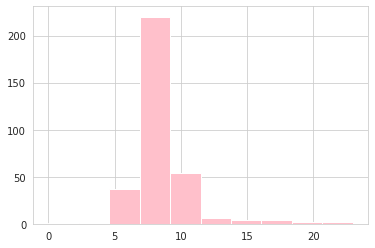

In [115]:
# Checking the distribution of batsmen 

Bowlers["Econ_Rate"].hist(color="pink")

**Filter 1**
*Since we have to assess bowlers, the players with economy rates above 10.5 are not likely to be good candidates for bowling as they are most likely batsmen.*

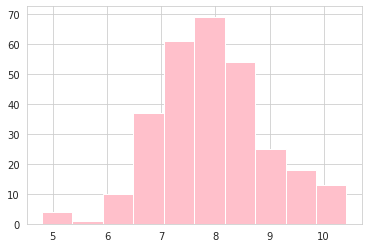

In [116]:
Bowlers = Bowlers[(Bowlers["Econ_Rate"] > 4) & (Bowlers["Econ_Rate"] < 10.5)]
Bowlers["Econ_Rate"].hist(color="pink")

# E. Applying K Means Clustering on Bowlers Data

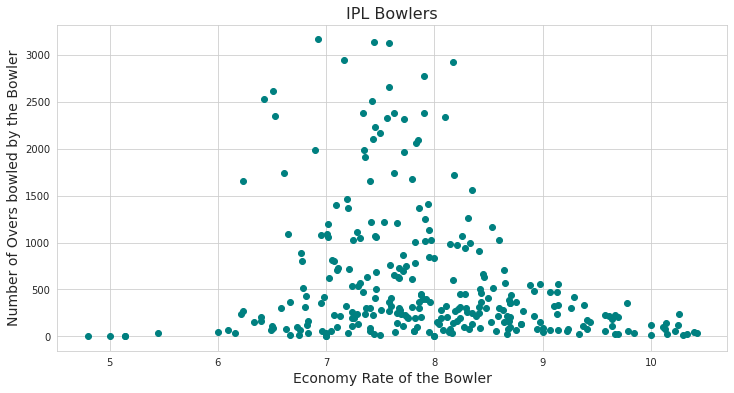

In [117]:
sns.set_style("whitegrid")

fig = plt.figure(figsize=(12,6))
plt.scatter(Bowlers["Econ_Rate"], Bowlers["Runs"], color="teal")
plt.xlabel("Economy Rate of the Bowler", fontsize=14)
plt.ylabel("Number of Overs bowled by the Bowler", fontsize=14)
plt.title("IPL Bowlers", fontsize=16)
plt.show()

#### The distribution appears to be in largely 5 clusters:
**under 500 runs - highest density of dots**

*500 - 1000 runs*

*1000 - 1500 runs*

*1500 - 2000 runs*

*above 2000 runs*

### Applying the clustering algorithm

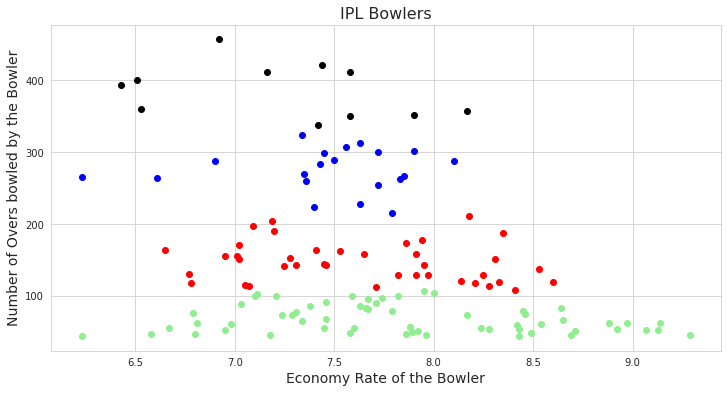

In [118]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(Bowlers[["Econ_Rate", "Over_count"]])
Bowlers["cluster"] = kmeans.labels_

fig = plt.figure(figsize=(12,6))

colors = ["blue", "lightgreen", "black", "red"]

for r in range(1,5):
    clustered_Bowlers = Bowlers[Bowlers["cluster"] == r]
    plt.scatter(clustered_Bowlers["Econ_Rate"], clustered_Bowlers["Over_count"], color=colors[r-1])
    
plt.title("IPL Bowlers", fontsize=16)
plt.xlabel("Economy Rate of the Bowler", fontsize=14)
plt.ylabel("Number of Overs bowled by the Bowler", fontsize=14)
    
plt.show()

### Merging the Player dataframe and Bowlers dataframe to show player names and cluster ids.

In [119]:
Bowlers = Bowlers.rename(columns={"Bowler_names": "Player_Id"})
Bowlers = Bowlers.sort_values(by ='cluster' )
Bowlers.head()

,Player_Id,Runs,Over_count,Econ_Rate,cluster
330,396,7.0,1.000000,7.00,0
150,211,129.0,14.666667,8.80,0
153,209,232.0,24.000000,9.67,0
154,219,8.0,1.000000,8.00,0
155,217,58.0,7.833333,7.40,0


In [120]:
Players_bowlers = Players[["Player_Id", "Player_Name","Bowling_Skill","DOB","Country"]]

Displaying the Bowling Skill of Batsmen

In [121]:
Bowlers = Bowlers[Bowlers.columns].merge(Players_bowlers, "left")
Bowlers

,Player_Id,Runs,Over_count,Econ_Rate,cluster,Player_Name,Bowling_Skill,DOB,Country
0,396,7.0,1.000000,7.00,0,KS Williamson,Right-arm offbreak,8-Aug-90,New Zealand
1,211,129.0,14.666667,8.80,0,AA Jhunjhunwala,Right-arm offbreak,1-Dec-82,India
2,209,232.0,24.000000,9.67,0,R Sathish,Right-arm medium,14-Jan-81,India
3,219,8.0,1.000000,8.00,0,RS Gavaskar,Slow left-arm orthodox,20-Feb-76,India
4,217,58.0,7.833333,7.40,0,JM Kemp,Right-arm fast-medium,2-Oct-77,South Africa
...,...,...,...,...,...,...,...,...,...
287,188,1074.0,144.166667,7.45,4,RJ Harris,Right-arm fast,11-Oct-79,Australia
288,186,1415.0,178.166667,7.94,4,SB Jakati,Slow left-arm orthodox,27-Nov-80,India
289,154,805.0,113.833333,7.07,4,JP Duminy,Right-arm offbreak,14-Apr-84,South Africa
290,382,1249.0,158.000000,7.91,4,YS Chahal,Legbreak googly,23-Jul-90,India


**Data visualization of Bowling Skill and Cluster assigned to player**

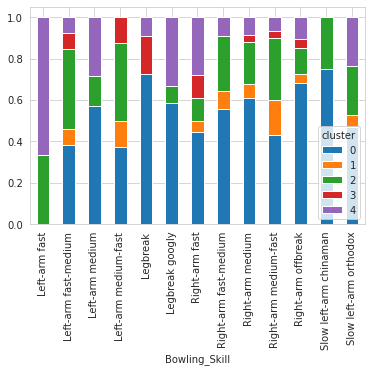

In [122]:
plot_bar(Bowlers, 'Bowling_Skill', 'cluster')
plt.show()

Saving the bowlers data along with the bowling skill and cluster id in a csv file

In [123]:
Bowlers.to_csv('Bowlers.csv') 

In [124]:
final=pd.concat([Batsmen,Bowlers],sort="True").reset_index(drop=True)
final

,Balls_played,Batting_Hand,Bowling_Skill,Country,DOB,Econ_Rate,Over_count,Player_Id,Player_Name,Runs,Strike_Rate,cluster
0,71.0,Left_Hand,NaN,Australia,17-Nov-75,NaN,NaN,182,LA Carseldine,81.0,114.08,0
1,213.0,Right_Hand,NaN,India,9-Feb-84,NaN,NaN,231,MD Mishra,237.0,111.27,0
2,9.0,Right_Hand,NaN,West Indies,30-Jun-88,NaN,NaN,240,KAJ Roach,10.0,111.11,0
3,159.0,Right_Hand,NaN,England,26-May-76,NaN,NaN,241,PD Collingwood,203.0,127.67,0
4,26.0,Right_Hand,NaN,India,25-Oct-89,NaN,NaN,244,A Mithun,34.0,130.77,0
...,...,...,...,...,...,...,...,...,...,...,...,...
511,NaN,NaN,Right-arm fast,Australia,11-Oct-79,7.45,144.166667,188,RJ Harris,1074.0,NaN,4
512,NaN,NaN,Slow left-arm orthodox,India,27-Nov-80,7.94,178.166667,186,SB Jakati,1415.0,NaN,4
513,NaN,NaN,Right-arm offbreak,South Africa,14-Apr-84,7.07,113.833333,154,JP Duminy,805.0,NaN,4
514,NaN,NaN,Legbreak googly,India,23-Jul-90,7.91,158.000000,382,YS Chahal,1249.0,NaN,4


Saving the batsmen and bowlers data along with the batting hand, bowling skill and cluster id in a csv file

In [125]:
final.to_csv('final.csv')

#F. Example of a well-rounded Team

####Selecting top 5 batsmen

In [126]:
# batsmen_team = pd.read_csv("Batsmen.csv",nrows=5)
batsmen_team=Batsmen[['Player_Name','Strike_Rate','DOB','Country']]
batsmen_team=batsmen_team.head(5)
batsmen_team

,Player_Name,Strike_Rate,DOB,Country
0,LA Carseldine,114.08,17-Nov-75,Australia
1,MD Mishra,111.27,9-Feb-84,India
2,KAJ Roach,111.11,30-Jun-88,West Indies
3,PD Collingwood,127.67,26-May-76,England
4,A Mithun,130.77,25-Oct-89,India


####Selecting top 5 bowlers

In [127]:
# bowlers_team = pd.read_csv("Bowlers.csv",nrows=5)
bowlers_team=Bowlers[['Player_Name','Econ_Rate','DOB','Country']]
bowlers_team=bowlers_team.head(5)
bowlers_team

,Player_Name,Econ_Rate,DOB,Country
0,KS Williamson,7.00,8-Aug-90,New Zealand
1,AA Jhunjhunwala,8.80,1-Dec-82,India
2,R Sathish,9.67,14-Jan-81,India
3,RS Gavaskar,8.00,20-Feb-76,India
4,JM Kemp,7.40,2-Oct-77,South Africa


####Selecting top 10 all rounders

In [128]:
d1 = pd.merge(Batsmen,Bowlers, how='inner', on=['Player_Id'])
d2 = pd.merge(d1,Players, on='Player_Id')
all_rounder_team=d2[['Player_Name_x','Strike_Rate','Econ_Rate','DOB','Country']]
all_rounder_team.rename(columns = {'Player_Name_x':'Player_Name'}, inplace = True) 
all_rounder_team=all_rounder_team.head(10)
all_rounder_team

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Player_Name,Strike_Rate,Econ_Rate,DOB,Country
0,LA Carseldine,114.08,5.14,17-Nov-75,Australia
1,KAJ Roach,111.11,9.23,30-Jun-88,West Indies
2,PD Collingwood,127.67,6.73,26-May-76,England
3,A Mithun,130.77,9.13,25-Oct-89,India
4,AP Dole,147.83,9.37,9-Oct-87,India
5,AN Ahmed,133.33,8.54,5-Nov-88,India
6,MR Marsh,111.94,7.60,20-Oct-91,Australia
7,AC Voges,126.57,8.14,4-Oct-79,Australia
8,AC Thomas,105.26,7.45,9-Feb-77,England
9,JEC Franklin,103.88,8.59,7-Nov-80,New Zealand


#### Merging the 3 dataframes to show the example of a well rounded team

In [129]:
df=pd.concat([batsmen_team,bowlers_team,all_rounder_team],sort=True).drop_duplicates(subset='Player_Name', keep="first").reset_index(drop=True)
df=df[['Player_Name','Strike_Rate','Econ_Rate','DOB','Country']]
print("-"*30,"Well rounded team","-"*30,"\n")
df

------------------------------ Well rounded team ------------------------------ 



,Player_Name,Strike_Rate,Econ_Rate,DOB,Country
0,LA Carseldine,114.08,NaN,17-Nov-75,Australia
1,MD Mishra,111.27,NaN,9-Feb-84,India
2,KAJ Roach,111.11,NaN,30-Jun-88,West Indies
3,PD Collingwood,127.67,NaN,26-May-76,England
4,A Mithun,130.77,NaN,25-Oct-89,India
5,KS Williamson,NaN,7.00,8-Aug-90,New Zealand
6,AA Jhunjhunwala,NaN,8.80,1-Dec-82,India
7,R Sathish,NaN,9.67,14-Jan-81,India
8,RS Gavaskar,NaN,8.00,20-Feb-76,India
9,JM Kemp,NaN,7.40,2-Oct-77,South Africa


The players with:

Strike_Rate: NaN are **batsmen**

Economy_Rate: NaN are **bowlers**

both Strike_Rate and Economy_Rate listed are **all rounders**.